In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co2_data = pd.read_csv("../../datasets/OWID_emissions.csv")

co2_data.tail()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,0.531,0.033,8.396,0.547,6.962,...,NaN,0.111,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956
48057,Zimbabwe,2022,ZWE,16320539.0,NaN,0.531,0.033,8.856,0.460,5.477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
disaster_data = pd.read_csv("../../datasets/IMF_climate_disasters.csv")
disaster_data.tail()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
965,966,Zambia,ZM,ZMB,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0
966,967,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
967,968,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
968,969,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0
969,970,Zimbabwe,ZW,ZWE,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,2.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,2.0


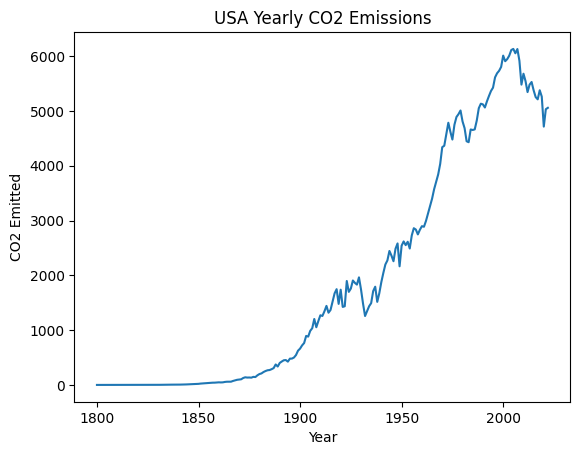

In [ ]:
# quick graph of some country data for demo
usa = co2_data[co2_data['iso_code'] == 'USA']
plt.plot(usa['year'], usa['co2'])
plt.ylabel("CO2 Emitted")
plt.xlabel("Year")
plt.title("USA Yearly CO2 Emissions")
plt.show()


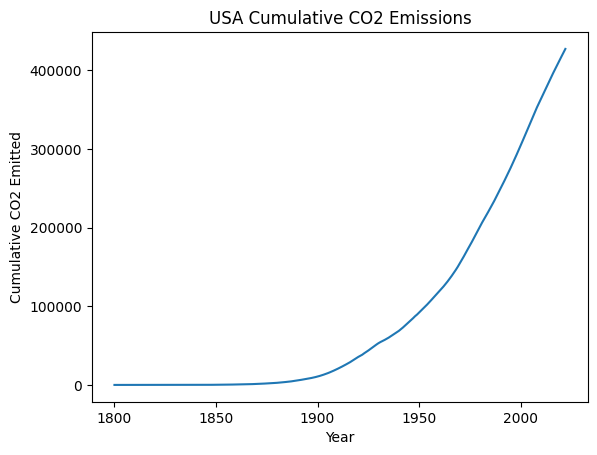

In [ ]:
# transform to cumulative sums
# honestly even easier than I expected
co2_data['cumulative_co2'] = co2_data.groupby('iso_code')['co2'].cumsum()
usa = co2_data[co2_data['iso_code'] == 'USA']
plt.plot(usa['year'], usa['cumulative_co2'])
plt.ylabel("Cumulative CO2 Emitted")
plt.xlabel("Year")
plt.title("USA Cumulative CO2 Emissions")
plt.show()

In [ ]:
# Transform data for use with plotly

# edit these values to change what gets produced
data = pd.read_csv("../../datasets/OWID_emissions.csv")
column = "co2_per_capita"
compute_cumulative = True

# code here
if compute_cumulative:
    data[column] = data.groupby('iso_code')[column].cumsum()

data = data[[column, 'iso_code','year']]
data.dropna(inplace=True)
data = data.pivot(index='iso_code',columns='year',values=column).reset_index()
data.to_csv("../../datasets/OWID_" + column + "_pivoted.csv")
data.tail()

year,iso_code,1750,1760,1770,1780,1790,1800,1801,1802,1803,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
208,WSM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.710,30.709,31.825,32.984,34.166,35.302,36.581,37.706,38.859,39.981
209,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.319,41.273,41.767,42.109,42.432,42.808,43.183,43.520,43.871,44.208
210,ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,645.697,654.319,662.305,670.404,678.161,685.752,693.765,701.160,708.326,715.072
211,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.830,43.140,43.452,43.802,44.198,44.614,45.036,45.466,45.911,46.357
212,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.755,129.617,130.483,131.212,131.842,132.554,133.191,133.692,134.217,134.760


In [39]:
# transformation for the disaster dataset
# transform the disaster data into individual row entries
data = pd.read_csv("../../datasets/IMF_climate_disasters.csv")
data = data.drop(columns=['ISO2', 'Indicator', 'Unit', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Country', 'ObjectId'])
data = data.groupby(['ISO3']).sum()
# for some reason entries are doubled in the original, this just evens it back out
data *= 0.5
data.columns.name = 'Year'
# this turns the years-in-columns thing to a big list of ISO3, year, disasters
data = data.reset_index().melt(id_vars='ISO3', var_name='Year', value_name='Disasters')
# now it's easy to do the cumulative sum
data['Disasters'] = data.groupby('ISO3')['Disasters'].cumsum()
# then we pivot it back to the years-in-columns format and save
data = data.pivot(index='ISO3', columns='Year', values='Disasters')
# add in columns back to 1961
for i in range(1960, 1980):
    data[str(i)] = 0
data.to_csv("../../datasets/disasters_cumulative.csv")
data.tail()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
ISO3,,,,,,,,,,,,,,,,,,,,,
WSM,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
ZAF,1.0,3.0,3.0,4.0,6.0,6.0,7.0,8.0,10.0,10.0,...,0,0,0,0,0,0,0,0,0,0
ZMB,0.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
ZWE,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
